In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import sys

### Importando dados de Vistoria

In [6]:
df_vistorias = pd.read_csv('/home/breno/projects/sobre-rodas/data/raw/V_VISTORIAS_EXECUTADAS_202510141605.csv')
print(df_vistorias.info())
print(df_vistorias.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6105 entries, 0 to 6104
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CD_MUNICIPIO                 6105 non-null   int64 
 1   SITUACAO_VISTORIA            6105 non-null   int64 
 2   SITUACAO_VISTORIA_DESCRICAO  6105 non-null   object
 3   DATA_EXECUCAO                6105 non-null   object
dtypes: int64(2), object(2)
memory usage: 190.9+ KB
None
   CD_MUNICIPIO  SITUACAO_VISTORIA SITUACAO_VISTORIA_DESCRICAO  \
0           571                  3                    NÃO APTO   
1           571                  3                    NÃO APTO   
2           571                  3                    NÃO APTO   
3           571                  3                    NÃO APTO   
4           571                  3                    NÃO APTO   

             DATA_EXECUCAO  
0  2024-07-02 11:13:17.000  
1  2024-07-02 09:31:11.000  
2  2024-12-

### Importando dados de Município

In [7]:
df_municipios = pd.read_csv('/home/breno/projects/sobre-rodas/data/raw/ORGAO_EMPRESA_202510141615.csv')
df_municipios = df_municipios.rename(columns={'CD_ORGAO_EMPRESA': 'CD_MUNICIPIO', 'NM_ORGAO_EMPRESA': 'NM_MUNICIPIO'})
print(df_municipios.info())
print(df_municipios.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CD_MUNICIPIO  473 non-null    int64 
 1   NM_MUNICIPIO  473 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.5+ KB
None
   CD_MUNICIPIO        NM_MUNICIPIO
0             1              MATRIZ
1             2              ITAJAÍ
2             3  BALNEÁRIO CAMBORIU
3             4       FLORIANÓPOLIS
4             5             TUBARÃO


### Concatenando Dataframes de vistorias com municipios

In [8]:
df_merged = pd.merge(
    df_vistorias,
    df_municipios,
    on='CD_MUNICIPIO',  # Coluna comum para o join
    how='left'         # Usa todas as linhas de df_vistoria e adiciona as colunas de df_municipios
)
df_vistorias = df_merged
print(df_vistorias.info())
print(df_vistorias.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6105 entries, 0 to 6104
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CD_MUNICIPIO                 6105 non-null   int64 
 1   SITUACAO_VISTORIA            6105 non-null   int64 
 2   SITUACAO_VISTORIA_DESCRICAO  6105 non-null   object
 3   DATA_EXECUCAO                6105 non-null   object
 4   NM_MUNICIPIO                 6105 non-null   object
dtypes: int64(2), object(3)
memory usage: 238.6+ KB
None
   CD_MUNICIPIO  SITUACAO_VISTORIA SITUACAO_VISTORIA_DESCRICAO  \
0           571                  3                    NÃO APTO   
1           571                  3                    NÃO APTO   
2           571                  3                    NÃO APTO   
3           571                  3                    NÃO APTO   
4           571                  3                    NÃO APTO   

             DATA_EXECUCAO NM_MUNICIPIO  

### Calculando número de vistorias por município

In [10]:
df_num_vistorias_municipio = df_vistorias.groupby('NM_MUNICIPIO').size().reset_index(name='COUNT_VISTORIAS')
df_num_vistorias_municipio

,NM_MUNICIPIO,COUNT_VISTORIAS
0,AGUA DOCE,324
1,BELA VISTA DO TOLDO,227
2,BELMONTE,6
3,DESCANSO,1524
4,IPORÃ DO OESTE,1378
5,IRACEMINHA,131
6,ITAIÓPOLIS,7
7,LUIZ ALVES,2
8,MAJOR VIEIRA,598
9,MATOS COSTA,130


### Calculando número de vistorias apto e apto com restrição po rmunicipio

In [14]:
filtro = ['APTO', 'APTO COM RESTRIÇÃO']
df_filtrado = df_vistorias[df_vistorias['SITUACAO_VISTORIA_DESCRICAO'].isin(filtro)]

df_contagem_aptos = df_filtrado.groupby('NM_MUNICIPIO').size().reset_index(name='COUNT_VISTORIAS')
df_contagem_aptos

,NM_MUNICIPIO,COUNT_VISTORIAS
0,AGUA DOCE,177
1,BELA VISTA DO TOLDO,139
2,BELMONTE,4
3,DESCANSO,1050
4,IPORÃ DO OESTE,1202
5,IRACEMINHA,79
6,ITAIÓPOLIS,4
7,LUIZ ALVES,2
8,MAJOR VIEIRA,330
9,MATOS COSTA,38


### Plotando vistorias aptas por município

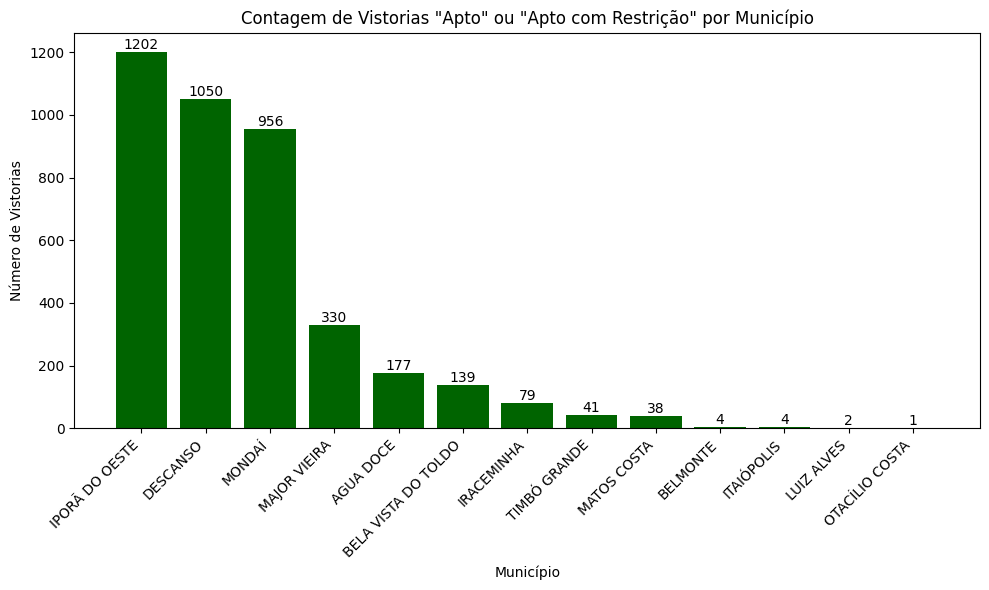

In [20]:
df_plot = df_contagem_aptos.sort_values(by='COUNT_VISTORIAS', ascending=False)

municipios = df_plot['NM_MUNICIPIO']
contagens = df_plot['COUNT_VISTORIAS']

plt.figure(figsize=(10, 6))
bars = plt.bar(municipios, contagens, color='darkgreen')

plt.title('Contagem de Vistorias "Apto" ou "Apto com Restrição" por Município')
plt.xlabel('Município')
plt.ylabel('Número de Vistorias')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('contagem_vistorias_filtradas.png')

### Gravando dataframe df_num_vistorias_municipio no banco de dados

In [19]:
# --- 1. Dados de Conexão com o PostgreSQL ---

DB_USER = "superset"
DB_PASSWORD = "superset"
DB_HOST = "superset.casan.com.br"
DB_PORT = "5432"
DB_NAME = "sobrerodas"
TABLE_NAME = "vistorias"

# --- 2. Criar a Engine de Conexão (SQLAlchemy) ---

DATABASE_URL = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

try:
    engine = create_engine(DATABASE_URL)
    print("Engine de conexão criada com sucesso.")
    
    # --- 3. Gravar o DataFrame na Tabela do PostgreSQL ---
    
    df_num_vistorias_municipio.to_sql(
        name=TABLE_NAME, 
        con=engine, 
        if_exists='replace', # Opções: 'fail', 'replace', 'append'
        index=False          # Não grava o índice do DataFrame como coluna
    )

    print(f"\nDataFrame gravado com sucesso na tabela '{TABLE_NAME}' no banco de dados '{DB_NAME}'.")

except ImportError:
    print("\nERRO: Certifique-se de que os pacotes 'pandas', 'sqlalchemy' e 'psycopg2' estão instalados.")
    print("Execute: pip install pandas sqlalchemy psycopg2")
except Exception as e:
    print(f"\nOCORREU UM ERRO ao tentar conectar ou gravar no banco de dados:")
    print(e)
    # Exibe a linha do erro, se possível
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(f"Linha do erro: {exc_tb.tb_lineno}")
finally:
    # É uma boa prática descartar a engine no final, embora não seja estritamente necessário 
    # se o script for encerrado logo em seguida.
    if 'engine' in locals():
        engine.dispose()

Engine de conexão criada com sucesso.

DataFrame gravado com sucesso na tabela 'vistorias' no banco de dados 'sobrerodas'.


### Gravando dataframe df_contagem_aptos no banco de dados

In [21]:
DB_USER = "superset"
DB_PASSWORD = "superset"
DB_HOST = "superset.casan.com.br"
DB_PORT = "5432"
DB_NAME = "sobrerodas"
TABLE_NAME = "vistorias_aptas"

# --- 2. Criar a Engine de Conexão (SQLAlchemy) ---

DATABASE_URL = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

try:
    engine = create_engine(DATABASE_URL)
    print("Engine de conexão criada com sucesso.")
    
    # --- 3. Gravar o DataFrame na Tabela do PostgreSQL ---
    
    df_contagem_aptos.to_sql(
        name=TABLE_NAME, 
        con=engine, 
        if_exists='replace', # Opções: 'fail', 'replace', 'append'
        index=False          # Não grava o índice do DataFrame como coluna
    )

    print(f"\nDataFrame gravado com sucesso na tabela '{TABLE_NAME}' no banco de dados '{DB_NAME}'.")

except ImportError:
    print("\nERRO: Certifique-se de que os pacotes 'pandas', 'sqlalchemy' e 'psycopg2' estão instalados.")
    print("Execute: pip install pandas sqlalchemy psycopg2")
except Exception as e:
    print(f"\nOCORREU UM ERRO ao tentar conectar ou gravar no banco de dados:")
    print(e)
    # Exibe a linha do erro, se possível
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(f"Linha do erro: {exc_tb.tb_lineno}")
finally:
    # É uma boa prática descartar a engine no final, embora não seja estritamente necessário 
    # se o script for encerrado logo em seguida.
    if 'engine' in locals():
        engine.dispose()

Engine de conexão criada com sucesso.

DataFrame gravado com sucesso na tabela 'vistorias_aptas' no banco de dados 'sobrerodas'.
